[An Introduction to Clustering Algorithms in Python](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)
===
Clustering -> supervised learning
The Notebook explores two of the most common forms of clustering: **k-means** and **hierarchical**.
# Understanding the K-Means Clustering Algorithm

Let’s look at how k-means clustering works. First, let me introduce you to my good friend, blobby; i.e. the [**make_blobs**](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function in Python’s [**sci-kit learn library**](http://scikit-learn.org/stable/). We’ll create four random clusters using make_blobs to aid in our task.

(-15, 15)

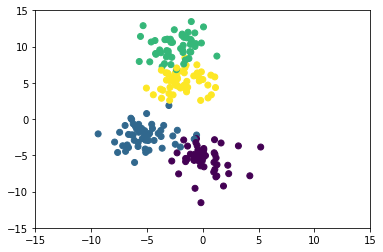

In [1]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

Next, we take each point and find the nearest centroid. There are different ways to measure distance, but I used Euclidean distance, which can be measured using [**np.linalg.norm**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) in Python.
# Implementing K-Means Clustering in Python

To run k-means in Python, we’ll need to import [**KMeans**](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from sci-kit learn.

In [2]:
# import KMeans
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=4)

# fit kmeans object to data
kmeans.fit(points)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

[[-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]]


(-15, 15)

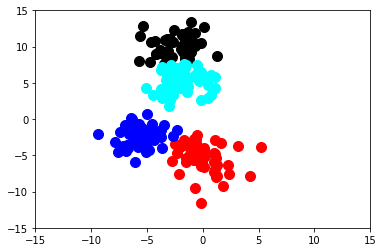

In [3]:
# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)

KMeans suffers the result of the random initialization trap. Essentially, the starting centroids can dictate the location of our clusters in k-mean clustering.

This isn’t the result we wanted, but one way to combat this is with the [k-means ++ algorithm](http://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf), which provides better initial seeding in order to find the best clusters. Fortunately, this is automatically done in k-means implementation we’ll be using in Python.
k-means++ algorithm did a better job than the plain ole’ k-means, as it nearly perfectly captured the boundaries of the initial clusters we created.

**`K-means is the most frequently used form of clustering due to its speed and simplicity`.**

Another very common clustering method is hierarchical clustering.
# Implementing Agglomerative Hierarchical Clustering

Agglomerative hierarchical clustering differs from k-means in a key way. Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a “cluster.” Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.

Along the way, we create what’s called a dendrogram. This is our “history.” You can see the dendrogram for our data points below to get a sense of what’s happening.
![](https://cdn-images-1.medium.com/max/800/1*p3Z5TOp0egX3ItAXw0JZlQ.jpeg)
Let’s see how agglomerative hierarchical clustering works in Python. First, let’s import the necessary libraries from [**scipy.cluster.hierarchy**](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) and [**sklearn.clustering**](http://scikit-learn.org/stable/modules/clustering.html).

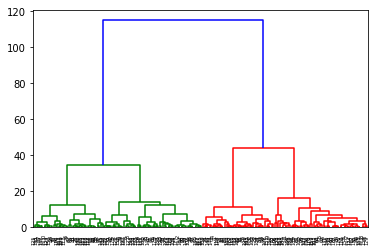

In [4]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

(-15, 15)

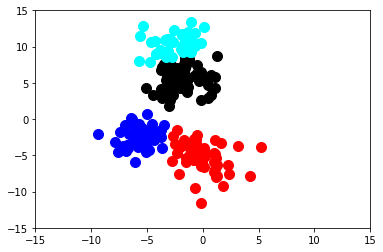

In [5]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(points)

plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc ==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)

In this instance, the results between k-means and hierarchical clustering were pretty similar. This is not always the case, however. In general, the **advantage of agglomerative hierarchical clustering** is that it tends to produce more accurate results. The **downside is that hierarchical clustering is more difficult to implement and more time/resource consuming than k-means**.

# Further Reading

If you want to know more about clustering, I highly recommend George Seif’s article, “[The 5 Clustering Algorithms Data Scientists Need to Know](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68).”